Here we have to predict the prices of the real estates 


So its clearly a regression problem 


We will be using RMSE for measuring the accuracy.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_excel('estate.xlsx')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTARTIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.isnull().sum()  #no null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTARTIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
data.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTARTIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTARTIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [35]:
data['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
data.describe()#to get min, max of each column and also counts

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTARTIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.287549,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705201,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


DATA VISUALIZATION

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTARTIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

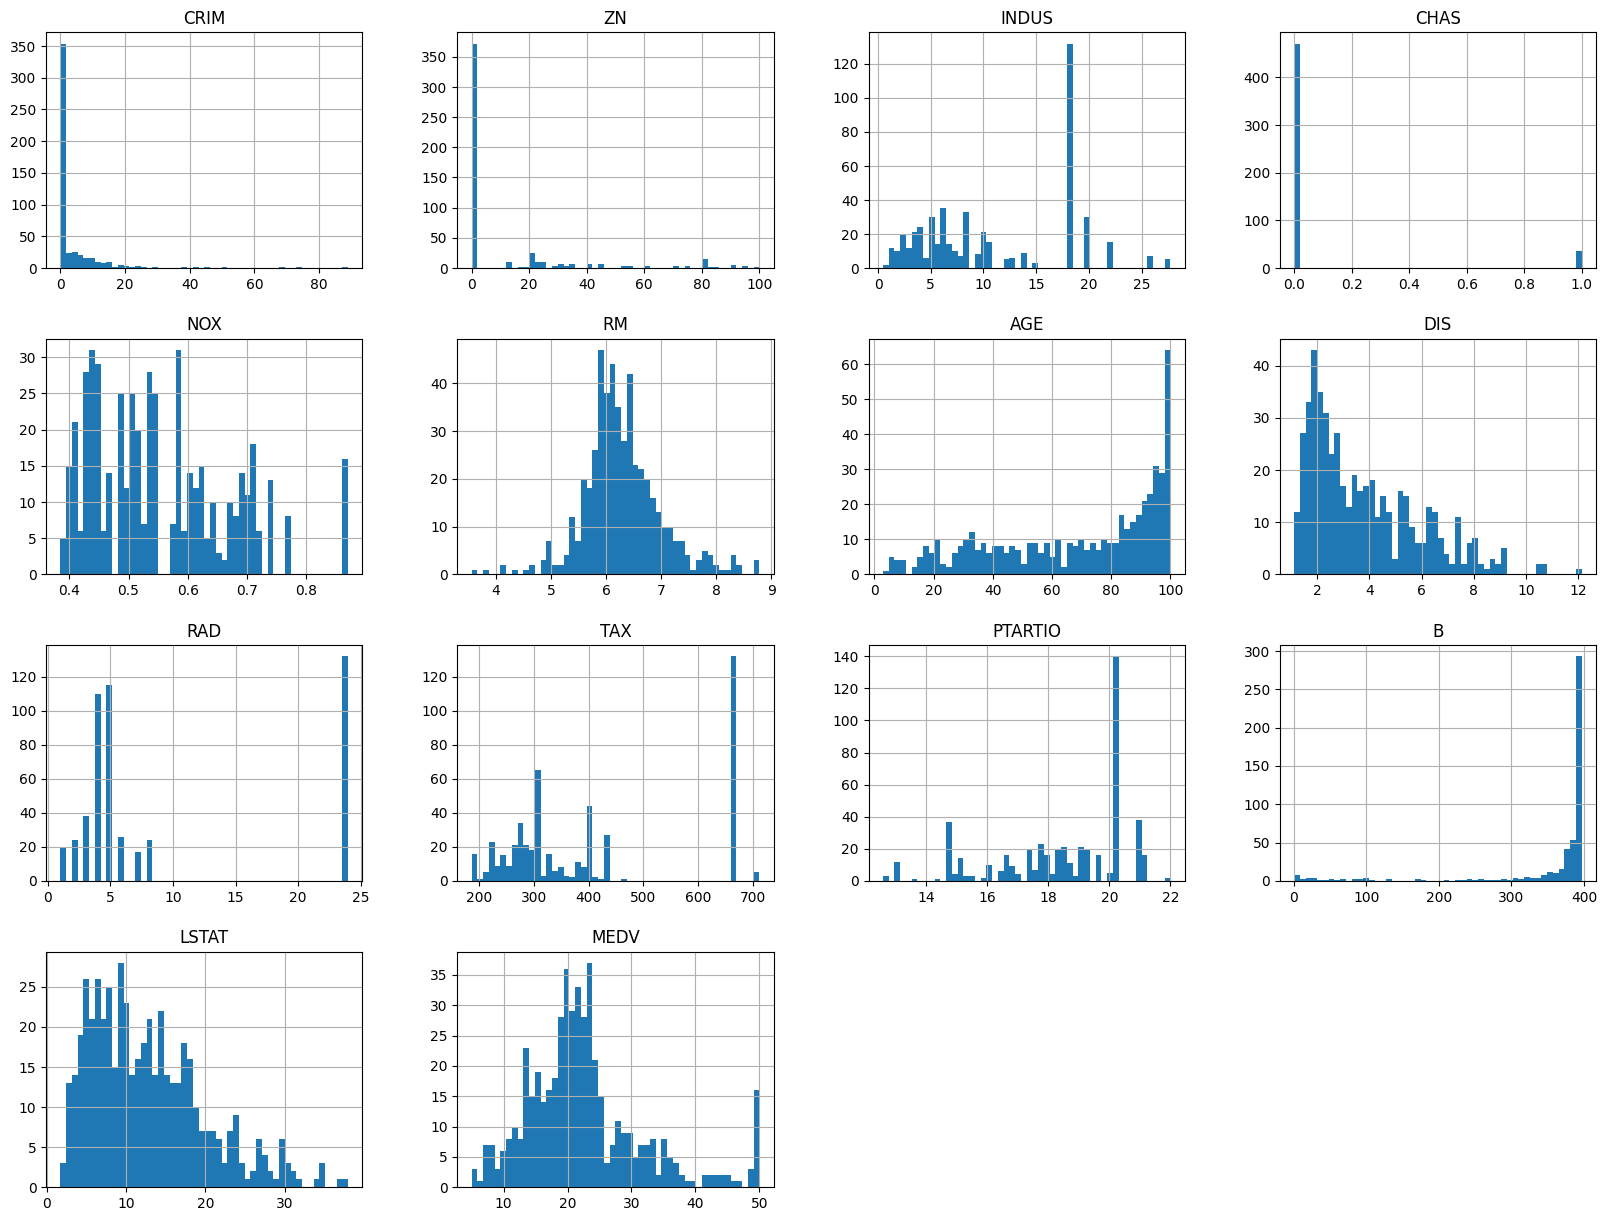

In [7]:
data.hist(bins=50,figsize=(20,15)) #this is more precise in terms of scaling
  #these plots are basically different value of a feature vs its frequency on y axis

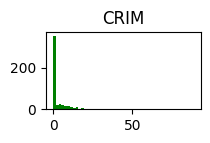

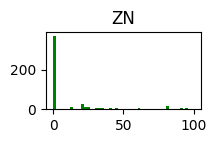

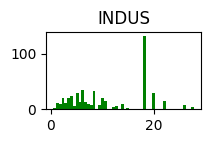

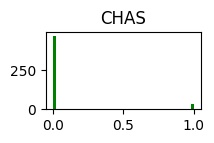

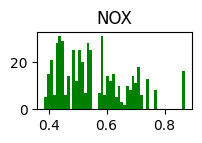

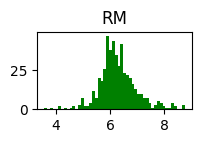

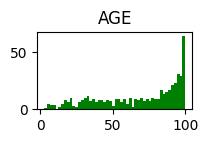

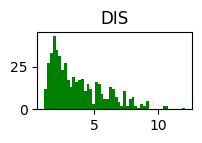

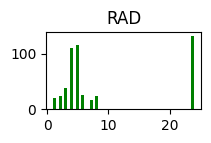

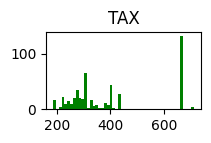

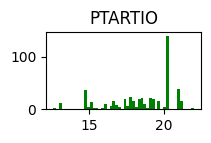

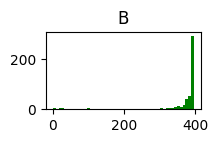

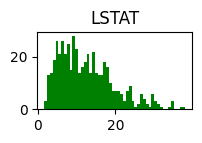

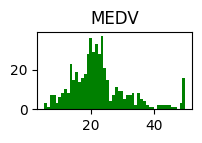

In [38]:
#another way to get histograms
col=data.columns

for i in col:
    plt.subplots(figsize=(2,1))
    plt.title(i)
    plt.hist(data[i],bins=50,color='green')

In [69]:
#X=data.drop(['MEDV'],axis=1)
#Y=data['MEDV']
#
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)  #by convention its always 42

#we are doing stratified shuffle split as to ensure that all the different types of data of each feature and label goes into test and training like it may be possible that only 0 portion of CHAS goes into training and only 1 portion of CHAS goes into testing

In [79]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,random_state=42,test_size=0.2)

for train_index,test_index in split.split(data,data['CHAS']):
    strat_train_set = data.loc[train_index]
    strat_test_set  = data.loc[test_index ]  

strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTARTIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [10]:
#pehli spiltting se Y ki splitting krli and doosri splitting se X ki splitting


LOOKING FOR CORRERELATION

In [80]:
corr_matrix=strat_train_set.corr()
corr_matrix['MEDV'].sort_values(ascending=True)  #we are seeing correlation as to see kaunsa factor directly ya inversely proportional hai final price(label) ke 

LSTAT     -0.740494
PTARTIO   -0.493534
INDUS     -0.473516
TAX       -0.456657
NOX       -0.422873
CRIM      -0.393715
RAD       -0.374693
AGE       -0.364596
CHAS       0.205066
DIS        0.240451
ZN         0.339741
B          0.361761
RM         0.679716
MEDV       1.000000
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

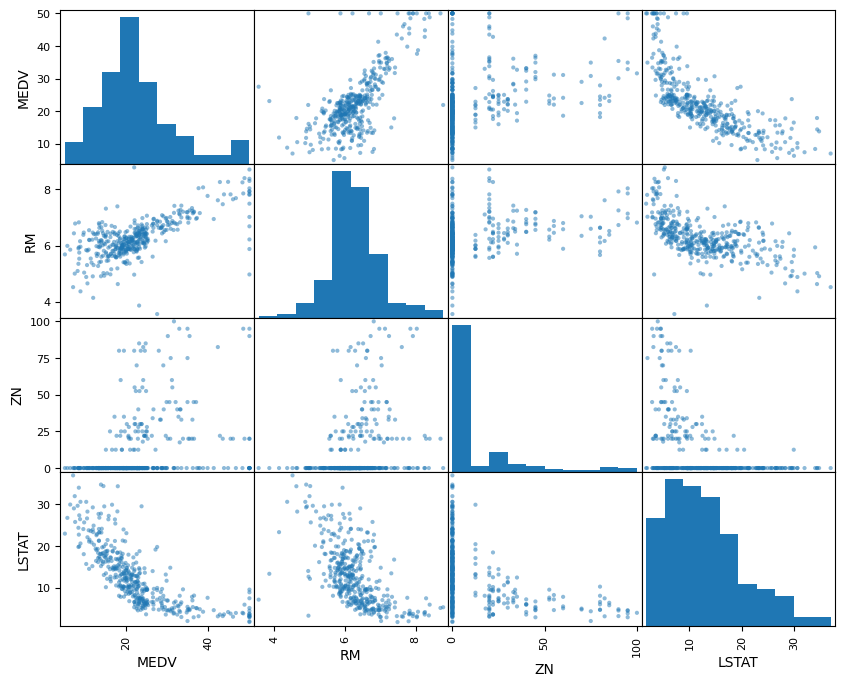

In [58]:
from pandas.plotting import scatter_matrix
attributes=['MEDV','RM','ZN','LSTAT']
scatter_matrix(strat_train_set[attributes],figsize=(10,8))

<Axes: xlabel='RM', ylabel='MEDV'>

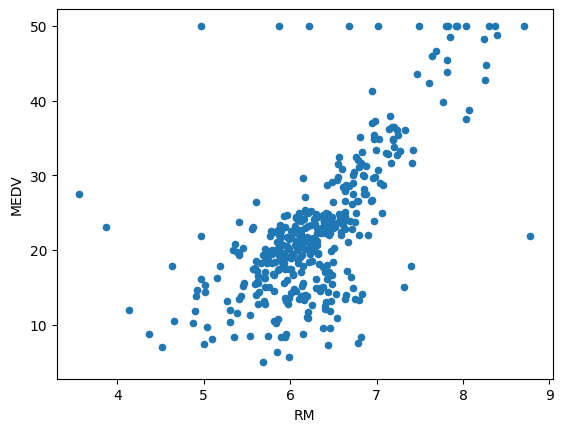

In [59]:
strat_train_set.plot(kind='scatter',y='MEDV',x='RM')

TRYING OUT NEW ATTRIBUTES

In [81]:
strat_train_set['TAXRM']=strat_train_set['TAX']/strat_train_set['RM']
strat_test_set['TAXRM']=strat_test_set['TAX']/strat_test_set['RM']
strat_test_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTARTIO,B,LSTAT,MEDV,TAXRM
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5,64.525994
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2,107.022336
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1,46.388637
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0,43.307704
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4,43.156140


In [17]:
corr_matrix=strat_train_set.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679716
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTARTIO   -0.493534
TAXRM     -0.525392
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

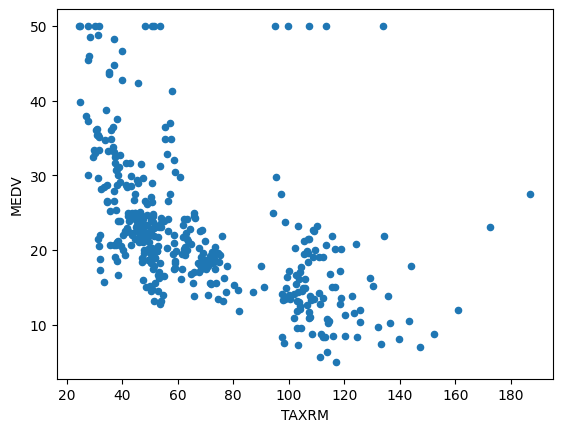

In [18]:
strat_train_set.plot(kind='scatter',y='MEDV',x='TAXRM')

In [63]:
strat_train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTARTIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281401,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.499605
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715198,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.563630
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.783385
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,53.867403
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.666667
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


In [ ]:
#in case some data is missed like we did in the RM column then what we can do?
#1. get rid of missing attributes
#2.get rid of that feature
#3.Set the missing value to some value(eg.- Mean, Median, etc.)

MISSING VALUES

In [19]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median') #Replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.
imputer.fit(data)   

SimpleImputer(strategy='median')

In [20]:
imputer.statistics_  #found median of all the columns

array([2.56510e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.75000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02,
       1.90500e+01, 3.91440e+02, 1.13600e+01, 2.12000e+01])

In [147]:
#X=imputer.transform(strat_train_set)  #so we designed a new dataframe in which the missing values in the original df was filled by the imputer by the median
#df=pd.DataFrame(X,columns=strat_train_set.columns)
#df.describe()

CREATE A PIPELINE

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy='median')),
                      ('std_scaler',StandardScaler())
                      ])
#can add as many inputs as u want in pipeline

In [92]:
train_data=my_pipeline.fit_transform(strat_train_set)
print(train_data.shape)

(404, 15)


In [68]:
#whenever we work on any ML model then the work which we did before creating a pipeline all this work should be in the pipeline

In [84]:
test_data=my_pipeline.fit_transform(strat_test_set)
test_data.shape

(102, 15)

In [91]:
train_set=pd.DataFrame(train_data,columns=strat_train_set.columns)
train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTARTIO,B,LSTAT,MEDV,TAXRM
0,-0.439420,3.126282,-1.121650,-0.272888,-1.422627,-0.242918,-1.312388,2.611114,-1.001686,-0.577819,-0.974918,0.411642,-0.860910,-0.065011,-0.503572
1,-0.443522,3.126282,-1.358938,-0.272888,-1.054257,0.497589,-1.393881,2.193123,-0.657667,-0.785579,-0.692779,0.391319,-0.941167,0.212355,-0.801747
2,0.156823,-0.489831,0.983368,-0.272888,0.479194,0.285413,0.870210,-0.687307,1.635794,1.505715,0.811966,0.446243,0.814802,-0.619742,1.123683
3,-0.422929,-0.489831,-0.577199,-0.272888,-0.557384,0.133659,-0.522259,0.378825,-0.542994,-0.744027,0.529827,0.453435,-0.819398,0.063004,-0.712272
4,-0.407863,-0.489831,-0.577199,-0.272888,-0.557384,0.043730,-1.422226,0.796434,-0.542994,-0.744027,0.529827,0.453435,-0.919028,0.052336,-0.697750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.008382,-0.489831,1.198819,3.664502,2.680852,-0.181092,0.480460,-0.954329,-0.542994,-0.055452,-1.774314,-2.765837,0.308352,-0.737089,-0.060175
400,0.426191,-0.489831,0.983368,-0.272888,0.479194,-0.249944,0.569040,-0.822535,1.635794,1.505715,0.811966,-3.656820,1.452707,-0.971783,1.327709
401,-0.435257,-0.489831,-1.230832,-0.272888,-0.968589,2.162678,-1.138772,-0.119730,-0.887013,-0.809323,-0.222546,0.418312,-1.276033,2.271261,-1.021492
402,0.142107,-0.489831,0.983368,-0.272888,1.327303,0.343024,0.618644,-0.625059,1.635794,1.505715,0.811966,-3.152392,0.738696,-0.897108,1.103148


In [93]:
test_set=pd.DataFrame(test_data,columns=strat_test_set.columns)
test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTARTIO,B,LSTAT,MEDV,TAXRM
0,-0.350822,-0.491484,-1.251835,-0.271448,-0.210673,0.350609,-0.254502,1.074344,-0.911505,0.179745,-1.080915,0.299519,-0.513573,-0.728288,0.031804
1,1.373039,-0.491484,1.157525,-0.271448,1.169579,-0.132004,1.203757,-1.227080,1.771545,1.640712,0.789260,0.355320,1.438541,-1.477324,1.412869
2,-0.293844,-0.491484,-0.611221,-0.271448,-0.309907,0.469359,0.509003,-0.337782,-0.094925,-0.508826,-0.428529,0.401968,-0.669683,0.888679,-0.557632
3,-0.342197,-0.491484,0.531775,3.683942,0.078007,0.096361,0.928750,-0.294779,-0.444888,-0.694441,-0.863453,0.355320,-0.238523,0.044527,-0.657758
4,-0.328707,-0.491484,-0.505691,-0.271448,-0.842160,-1.386494,1.033687,0.887195,-0.678196,-0.951906,-0.211066,0.401968,2.781084,-0.977967,-0.662683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-0.347767,-0.491484,-1.025911,-0.271448,-0.472289,1.061588,0.708021,-0.267242,-0.794851,-0.730366,-0.254559,0.401968,-0.981902,0.115864,-0.812932
98,0.011501,-0.491484,1.157525,-0.271448,1.025239,-0.544585,0.650125,-0.526675,1.771545,1.640712,0.789260,-5.132179,0.750172,-0.431051,1.571228
99,-0.348057,0.275833,-0.694457,-0.271448,-0.923352,0.306458,-1.651245,1.332645,-0.561542,-0.892031,-0.689483,0.401968,-1.014611,0.282316,-0.852302
100,-0.346313,-0.491484,2.279712,-0.271448,0.357666,-0.465418,0.628414,-0.844531,-0.794851,-1.221347,0.310843,0.118094,0.321985,-0.276488,-1.047585


Creating a linear model

In [96]:
X=train_set.drop(['MEDV','TAXRM'],axis=1)  #we are not aking TAXRM attribute which we intorduced as it could harm our linear model prediction
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTARTIO,B,LSTAT
0,-0.439420,3.126282,-1.121650,-0.272888,-1.422627,-0.242918,-1.312388,2.611114,-1.001686,-0.577819,-0.974918,0.411642,-0.860910
1,-0.443522,3.126282,-1.358938,-0.272888,-1.054257,0.497589,-1.393881,2.193123,-0.657667,-0.785579,-0.692779,0.391319,-0.941167
2,0.156823,-0.489831,0.983368,-0.272888,0.479194,0.285413,0.870210,-0.687307,1.635794,1.505715,0.811966,0.446243,0.814802
3,-0.422929,-0.489831,-0.577199,-0.272888,-0.557384,0.133659,-0.522259,0.378825,-0.542994,-0.744027,0.529827,0.453435,-0.819398
4,-0.407863,-0.489831,-0.577199,-0.272888,-0.557384,0.043730,-1.422226,0.796434,-0.542994,-0.744027,0.529827,0.453435,-0.919028
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.008382,-0.489831,1.198819,3.664502,2.680852,-0.181092,0.480460,-0.954329,-0.542994,-0.055452,-1.774314,-2.765837,0.308352
400,0.426191,-0.489831,0.983368,-0.272888,0.479194,-0.249944,0.569040,-0.822535,1.635794,1.505715,0.811966,-3.656820,1.452707
401,-0.435257,-0.489831,-1.230832,-0.272888,-0.968589,2.162678,-1.138772,-0.119730,-0.887013,-0.809323,-0.222546,0.418312,-1.276033
402,0.142107,-0.489831,0.983368,-0.272888,1.327303,0.343024,0.618644,-0.625059,1.635794,1.505715,0.811966,-3.152392,0.738696


In [97]:
Y=train_set['MEDV']
Y

0     -0.065011
1      0.212355
2     -0.619742
3      0.063004
4      0.052336
         ...   
399   -0.737089
400   -0.971783
401    2.271261
402   -0.897108
403    0.084340
Name: MEDV, Length: 404, dtype: float64

In [98]:
print(f'{X.shape},{Y.shape}')

(404, 13),(404,)


In [129]:
#from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
#model=DecisionTreeRegressor()
#model.fit(X,Y)
#y_pred=model.predict(X)
#mse=mean_squared_error(y_pred,Y)
#mse  #the mse came out to be zero as the model overfitted on our training data after we launched it using linear regression but then we we again launched it using decisiion tree then we found mse 0 as now it had same data points

0.0

In [106]:
#thus we are now using cross validation technique

In [130]:
from sklearn.model_selection import cross_val_score
#score1=cross_val_score(model,X,Y,cv=10)
#print(score1)                                        #these are the stndrd deviation from decision tree
#print(f'{score1.std()},{score1.mean()}')

[0.76267198 0.61301304 0.54296649 0.79739543 0.84666961 0.83795815
 0.78441695 0.87579852 0.7550467  0.88804433]
0.1063238096834501,0.7703981203651248


In [128]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X,Y)
score2=cross_val_score(model1,X,Y,cv=10)
print(score2)                                  #these are the stndrd deviation from linear reg.
print(f'{score2.std()},{score2.mean()}')

[0.71894087 0.78442168 0.61840163 0.79667824 0.70904873 0.64025676
 0.56259242 0.746197   0.60096188 0.69643211]
0.0750925051065165,0.6873931330214408


In [124]:
#from sklearn.ensemble import RandomForestRegressor
#model=RandomForestRegressor()
#model.fit(X,Y)
#score=cross_val_score(model,X,Y,cv=10)   #these are the stndrd deviation from random forest regressor
#print(score)
#print(f'{score.std()},{score.mean()}')

[0.87191315 0.91257575 0.72346513 0.90959831 0.88434849 0.87182201
 0.81682526 0.90778672 0.7699248  0.91103883]
0.06289974766189882,0.8579298450119748


In [131]:
#since sabse km error is in case of linear regression so we choose linear regression as our final model

Save our ml model

In [132]:
from joblib import dump, load   
dump(model1,'Dragon.joblib')

['Dragon.joblib']

Testing it on our test data

In [133]:
X0=test_set.drop(['TAXRM','MEDV'],axis=1)
X0

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTARTIO,B,LSTAT
0,-0.350822,-0.491484,-1.251835,-0.271448,-0.210673,0.350609,-0.254502,1.074344,-0.911505,0.179745,-1.080915,0.299519,-0.513573
1,1.373039,-0.491484,1.157525,-0.271448,1.169579,-0.132004,1.203757,-1.227080,1.771545,1.640712,0.789260,0.355320,1.438541
2,-0.293844,-0.491484,-0.611221,-0.271448,-0.309907,0.469359,0.509003,-0.337782,-0.094925,-0.508826,-0.428529,0.401968,-0.669683
3,-0.342197,-0.491484,0.531775,3.683942,0.078007,0.096361,0.928750,-0.294779,-0.444888,-0.694441,-0.863453,0.355320,-0.238523
4,-0.328707,-0.491484,-0.505691,-0.271448,-0.842160,-1.386494,1.033687,0.887195,-0.678196,-0.951906,-0.211066,0.401968,2.781084
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-0.347767,-0.491484,-1.025911,-0.271448,-0.472289,1.061588,0.708021,-0.267242,-0.794851,-0.730366,-0.254559,0.401968,-0.981902
98,0.011501,-0.491484,1.157525,-0.271448,1.025239,-0.544585,0.650125,-0.526675,1.771545,1.640712,0.789260,-5.132179,0.750172
99,-0.348057,0.275833,-0.694457,-0.271448,-0.923352,0.306458,-1.651245,1.332645,-0.561542,-0.892031,-0.689483,0.401968,-1.014611
100,-0.346313,-0.491484,2.279712,-0.271448,0.357666,-0.465418,0.628414,-0.844531,-0.794851,-1.221347,0.310843,0.118094,0.321985


In [144]:
Y0=test_set['MEDV']
Y0.shape

(102,)

In [148]:
y_pred=model1.predict(X0)
mse=mean_squared_error(y_pred,Y0)
print(np.sqrt(mse))

0.495939083763993
